In [65]:
import os
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [18]:
import json

def read_json_and_extract_article(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    sentences = data.get("clean_article", [])
    merged_sentences = [' '.join(sentence).replace(" ,", ",").replace(" .", ".") for sentence in sentences]
    article = ' '.join(merged_sentences)
    return article

def read_json_and_extract_summary(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    sentences = data.get("clean_summary", [])
    merged_sentences = [' '.join(sentence).replace(" ,", ",").replace(" .", ".") for sentence in sentences]
    article = ' '.join(merged_sentences)
    return article

# Example usage
file_path = './liputan6_data/canonical/train/26410.json'  
article = read_json_and_extract_summary(file_path)
print(article)

Masyarakat Bali merayakan Tahun Baru dengan tradisi unik dan pesta rakyat, yaitu melepas matahari 2001 serta menyambut matahari 2002. Pantai Kuta disesaki ribuan wisatawan.


## Loop ke semua file json di train untuk tokenizing n training

In [20]:
import pandas as pd

In [23]:
directory = './liputan6_data/canonical/train/'
liputan6_df = pd.DataFrame(columns=['article', 'summary'])
dict_list = []
for filename in os.listdir(directory):
    # Check if the file is a text file
    if filename.endswith('.json'):
        # Open and read the text file
        article = read_json_and_extract_article('./liputan6_data/canonical/train/'+filename)
        summary = read_json_and_extract_summary('./liputan6_data/canonical/train/'+filename)
        row_dict = {'article': article, 'summary': summary}
        dict_list.append(row_dict)


df_train =pd.DataFrame.from_dict(dict_list)
df_train.to_csv('df_train.csv', index=False)

In [156]:
df_train.sample(2000).to_csv('df_train.csv', index=False)

In [24]:
directory = './liputan6_data/canonical/test/'
liputan6_df = pd.DataFrame(columns=['article', 'summary'])
dict_list = []
for filename in os.listdir(directory):
    # Check if the file is a text file
    if filename.endswith('.json'):
        # Open and read the text file
        article = read_json_and_extract_article('./liputan6_data/canonical/test/'+filename)
        summary = read_json_and_extract_summary('./liputan6_data/canonical/test/'+filename)
        row_dict = {'article': article, 'summary': summary}
        dict_list.append(row_dict)


df_test =pd.DataFrame.from_dict(dict_list)
df_test.to_csv('df_test.csv', index=False)

In [157]:
df_test.sample(2000).to_csv('df_test.csv', index=False)

In [26]:
directory = './liputan6_data/canonical/dev/'
liputan6_df = pd.DataFrame(columns=['article', 'summary'])
dict_list = []
for filename in os.listdir(directory):
    # Check if the file is a text file
    if filename.endswith('.json'):
        # Open and read the text file
        article = read_json_and_extract_article('./liputan6_data/canonical/dev/'+filename)
        summary = read_json_and_extract_summary('./liputan6_data/canonical/dev/'+filename)
        row_dict = {'article': article, 'summary': summary}
        dict_list.append(row_dict)


df_dev =pd.DataFrame.from_dict(dict_list)
df_dev.to_csv('df_dev.csv', index=False)

In [158]:
df_dev.sample(2000).to_csv('df_dev.csv', index=False)

In [14]:
def read_text_files(directory):
    with open('clean_id.txt', 'w', encoding='utf-8') as output_file:
        # Iterate through all files in the directory
        for filename in os.listdir(directory):
            # Check if the file is a text file
            if filename.endswith('.json'):
                # Open and read the text file
                article = read_json_and_extract_article('./liputan6_data/canonical/train/'+filename)
                summary = read_json_and_extract_summary('./liputan6_data/canonical/train/'+filename)
                output_file.write(f"{article}\n")
                #print(filename)

directory_path = './liputan6_data/canonical/train/'
read_text_files(directory_path)

In [16]:
def count_unique_words(file_path):
    """Count the number of unique words in a text file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            # Read all the content of the file
            content = file.read()
            # Split the content into words and convert to lowercase
            words = content.lower().split()
            # Remove punctuation and other non-alphabetic characters
            words = [word.strip('.,!?:;()[]"\'') for word in words]
            # Count unique words using a set
            unique_words = set(words)
            return len(unique_words)
    except FileNotFoundError:
        return "File not found."

# Example usage
file_path = 'clean_id.txt'
print(count_unique_words(file_path))

294642


In [27]:
df_train

,article,summary
0,"Liputan6. com, Jakarta : Presiden Susilo Bamba...","Menurut Presiden Susilo Bambang Yudhoyono, kem..."
1,"Liputan6. com, Jakarta : Perdana Menteri Jepan...",Pada masa silam Jepang terlalu ambisius untuk ...
2,"Liputan6. com, Kutai : Banjir dengan ketinggia...",Puluhan hektare areal persawahan yang sebagian...
3,"Liputan6. com, Jakarta : Presiden Susilo Bamba...",Sekjen PBB Kofi Annan memuji langkah Presiden ...
4,"Liputan6. com, Solok : Warga Kampung Batu Dala...",Untuk mempercepat pelaksanaan belajar-mengajar...
...,...,...
193878,"Liputan6. com, Kutai : Banjir yang terjadi sel...",Sebanyak 25 kecamatan di Kutai Barat dan Kutai...
193879,"Liputan6. com, Kabupaten Gowa : Lima desa di K...",Ribuan kubik lumpur dari Gunung Bawakaraeng ya...
193880,"Liputan6. com, Nias : Sejumlah desa di kawasan...","Kawasan paling utara di Pulau Nias, Lahewa, ma..."
193881,"Liputan6. com, Bogor : Kebakaran di rumah warg...","Dari bukti-bukti di lapangan, kebakaran rumah ..."


In [148]:
df_train_eda = df_train.sample(10000)
df_train_eda['num_of_words'] = [len(i.split()) for i in df_train_eda['article']]

In [149]:
comment_words = ''
stops = ['\.','\,','jum','liputan ','sctv ','liputan','Liputan','SCTV','sctv','ke','dalam','yang','di','dan','dengan','ini','itu','dengan', 'juga','untuk','tersebut','dari','adalah','liputan6','liputan6.','Liputan6','Liputan6.','Liputan6. com','com','menjadi','akan','seperti','setelah','karena','tapi','namun','sudah','dalam','adalah','sebagai','telah','saat','hanya','menurut','atau','baca','bisa','masih','terjadi','sctv','sekitar','mengatakan','dia','ketika','selama','sejumlah','tak','belum','bukan','kepada','selain','para','hingga','sejumlah','tidak','sebelumnya','sudah','saya','kata','mereka','kini','sementara','lebih','bersama','ada','pada','oleh','bahkan','kami','jika','liputan','memang','antaranya','tetap','ia','baru']
stopwords = set(stops)

words_to_remove = stops

# Regular expression pattern for removal
pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))
df_train_eda['article_sw'] = df_train_eda['article'].apply(lambda x: re.sub(pattern, '', x))

#def remove_words(text, words):
#    return ' '.join(word for word in text.split() if word not in words)

# Apply the function to the DataFrame column
#df_train_eda['article_sw'] =  df_train_eda['article'].apply(lambda x: remove_words(x, words_to_remove))


In [150]:
df_train_eda

,article,summary,num_of_words,article_sw
100794,"Liputan6. com, Jakarta : Tim sukses pasangan S...",Pidato politik Megawati Soekarnoputri di Kebag...,117,". , Jakarta : Tim sukses pasangan SBY-Boediono..."
185051,"Liputan6. com, Jakarta : Lokasi ledakan di dep...","Di sekitar Kedutaan Besar Australia, Jalan Ras...",237,". , Jakarta : Lokasi ledakan depan Kedutaan B..."
56853,"Liputan6. com, Jakarta : Suasana di Terminal P...",Terminal bus antarkota di Jakarta belum meneri...,98,". , Jakarta : Suasana Terminal Pulogadung, Ja..."
111726,"Liputan6. com, Kendari : Dua kelompok pengunju...",Dua kelompok pengunjuk rasa berkelahi di halam...,260,". , Kendari : Dua kelompok pengunjuk rasa, Sen..."
27183,"Liputan6. com, Magelang : Belajar di kawasan s...","Meski SMA Taruna Nusantara, Magelang, Jateng, ...",694,". , Magelang : Belajar kawasan sejuk Lembah T..."
...,...,...,...,...
187170,"Liputan6. com, Lhoksemawe : Sebanyak 27 kepala...",Puluhan KK di dua desa di Kecamatan Syamtalira...,118,". , Lhoksemawe : Sebanyak 27 kepala keluarga ..."
149169,"Liputan6. com, Jakarta : Polisi sejauh ini sed...",Polisi sejauh ini sedang memburu lima pelaku y...,108,". , Jakarta : Polisi sejauh sedang memburu li..."
52749,"Liputan6. com, Yogyakarta : Gedung tua bekas k...",Hujan lebat disertai angin kencang melanda Kot...,88,". , Yogyakarta : Gedung tua bekas kantor sebua..."
65409,"Liputan6. com, Jakarta : Saham-saham di bursa ...",Nilai saham di Wall Street mencapai rekor tere...,148,". , Jakarta : Saham-saham bursa Wall Street t..."


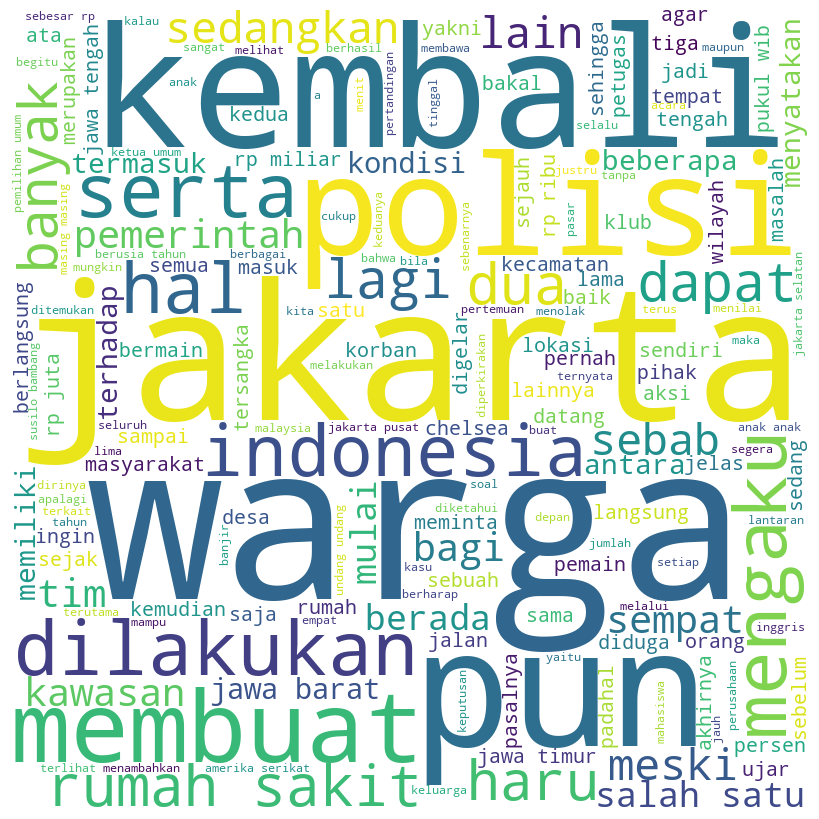

In [151]:


for val in df_train_eda['article']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower().strip()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

C:\Users\andi\AppData\Local\Temp\ipykernel_12800\3212270404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_eda['num_of_words'],


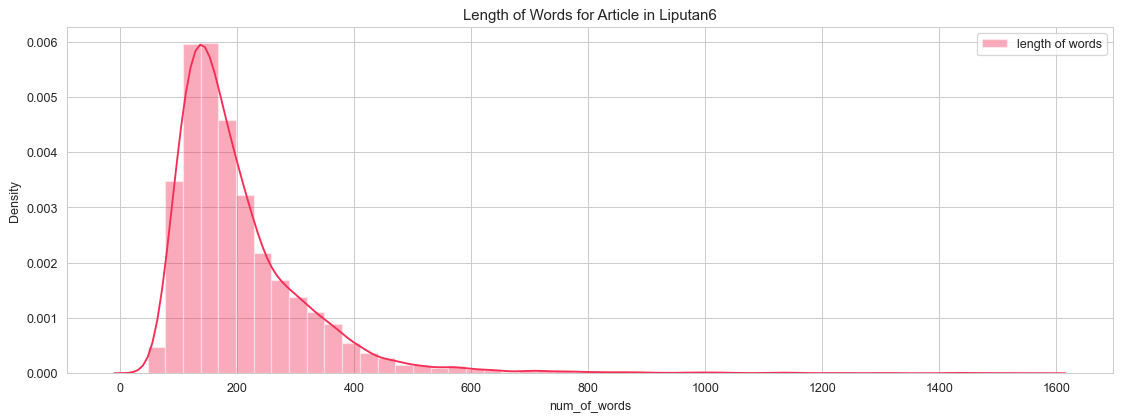

In [152]:
plt.figure(figsize = [15, 5], dpi = 90)
sns.distplot(df_train_eda['num_of_words'], 
             color = '#F42E56', 
             label = 'length of words')
          
plt.title('Length of Words for Article in Liputan6')
plt.legend()

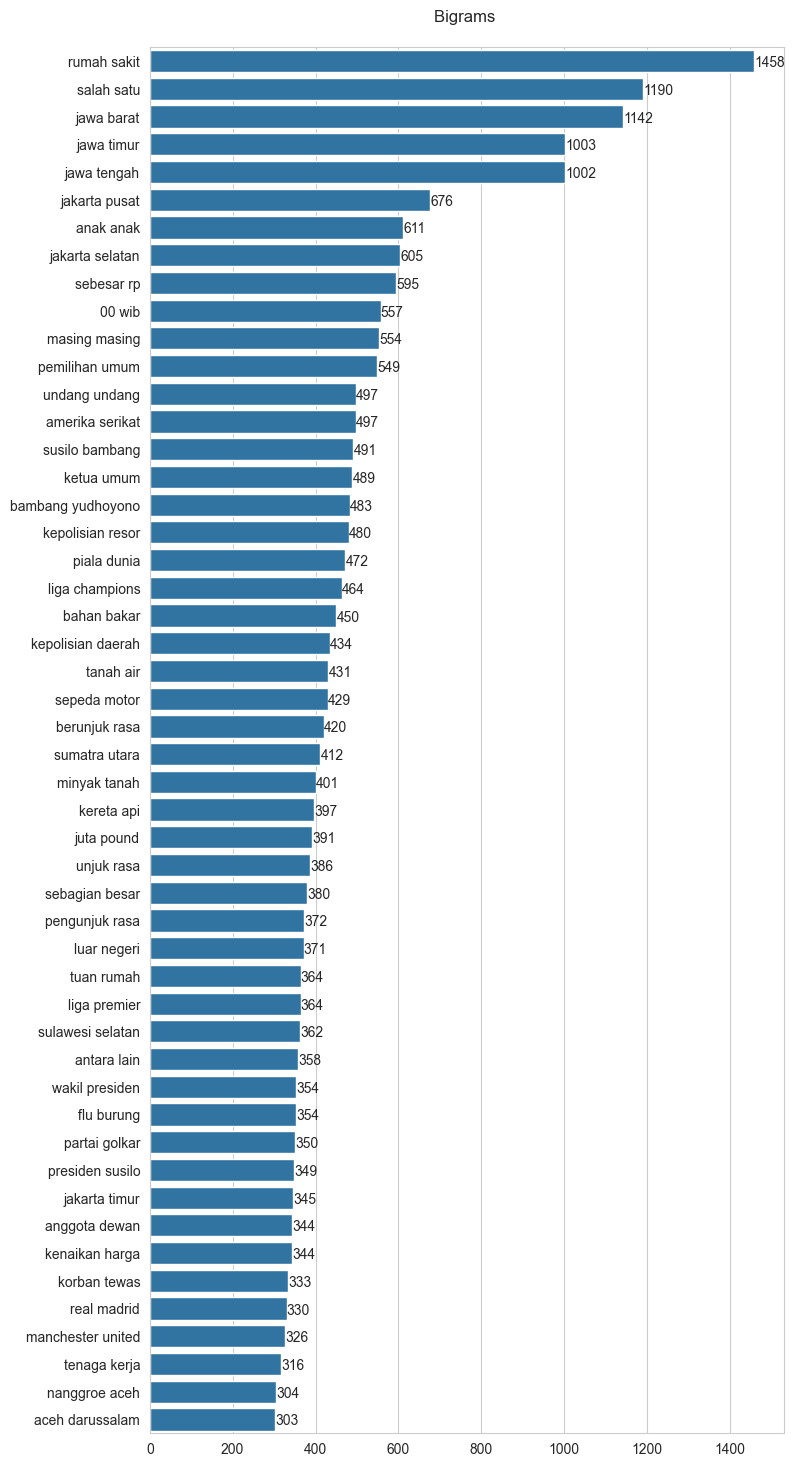

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
    
fig = plt.figure(figsize=(18,18))
top_tweet_bigrams=get_top_tweet_bigrams(df_train_eda['article_sw'])[:50]
x,y=map(list,zip(*top_tweet_bigrams))
fig.add_subplot(1, 2, 1)
sns.barplot(x=y,y=x)
plt.title('Bigrams \n')
index = 0
for i in top_tweet_bigrams :
    plt.text(i[1]+.5, index+.2, i[1])
    index+=1


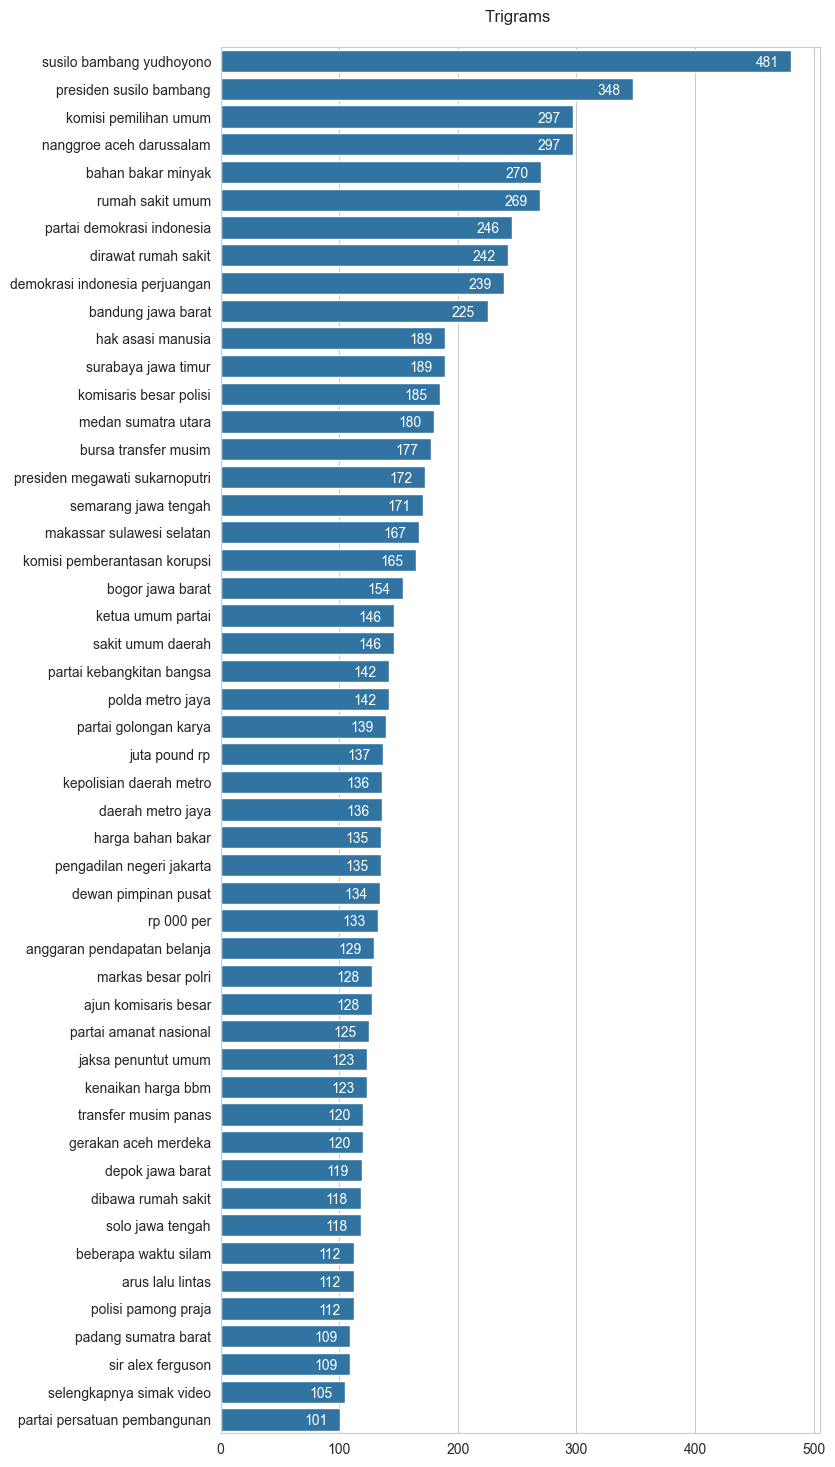

In [154]:
sns.set_style('whitegrid')
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
fig = plt.figure(figsize=(17,18))
top_tweet_bigrams=get_top_tweet_bigrams(df_train_eda['article_sw'])[:50]
x,y=map(list,zip(*top_tweet_bigrams))
fig.add_subplot(1, 2, 1)
sns.barplot(x=y,y=x)
plt.title('Trigrams \n')
index = 0
for i in top_tweet_bigrams :
    plt.text(i[1]-30, index+.2, i[1], color = 'white')
    index+=1

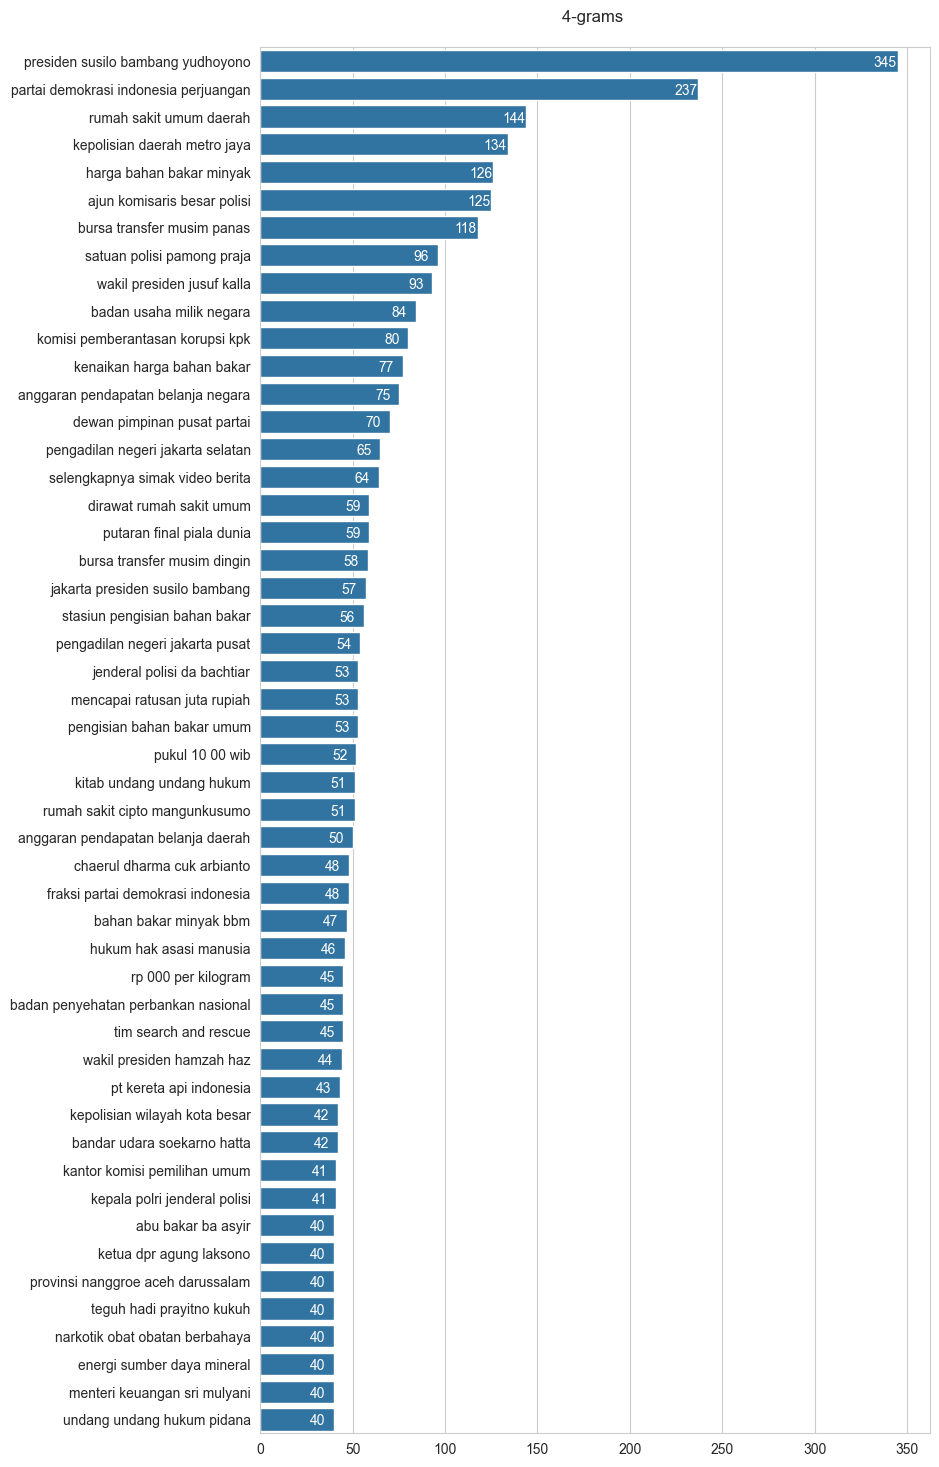

In [155]:
sns.set_style('whitegrid')
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4, 4)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
fig = plt.figure(figsize=(19,18))
top_tweet_bigrams=get_top_tweet_bigrams(df_train_eda['article_sw'])[:50]
x,y=map(list,zip(*top_tweet_bigrams))
fig.add_subplot(1, 2, 1)
sns.barplot(x=y,y=x)
#ax.grid(False)
plt.title('4-grams \n')
index = 0
for i in top_tweet_bigrams :
    plt.text(i[1]-13, index+.2, i[1], color = 'white')
    index+=1
    